In [1]:
!pip install squarify
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.1.3-cp310-cp310-linux_x86_64.whl size=11756984 sha256=0c8851072aad3c67609769333d1fa9fef1fb4e052599f062b80d08b8d3f9ffe9
  Stored in directory: /root/.cache/pip/wheels/a7/83/5a/c704868d367ace343ac89b928f3d937313a5b5fb5731483705
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# DATA UNDERSTANDING

## Read Data from Github

In [ ]:
url = 'https://raw.githubusercontent.com/hamidahmidah805/File/main/Dataset_8%20-%20Human%20Capital.csv'
df = pd.read_csv(url)
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## Melihat Informasi Awal Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
# data shape
df.shape

(54808, 13)

In [ ]:
# data describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


tidak ada outlier, hal ini ditunjukkan oleh tidak adanya ketimpangan antara mean dan median

## Menemukan Unique Value dalam setiap kolom

In [ ]:
X_cat = df[['department', 'region', 'education','gender','recruitment_channel','previous_year_rating','awards_won' ]]

for fitur in X_cat:
  unik = X_cat[fitur].unique()
  print("unique value dalam fitur {fitur} adalah \n{unique_value}\n".format(fitur=fitur, unique_value=unik))

unique value dalam fitur department adalah 
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']

unique value dalam fitur region adalah 
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']

unique value dalam fitur education adalah 
["Master's & above" "Bachelor's" nan 'Below Secondary']

unique value dalam fitur gender adalah 
['f' 'm']

unique value dalam fitur recruitment_channel adalah 
['sourcing' 'other' 'referred']

unique value dalam fitur previous_year_rating adalah 
[ 5.  3.  1.  4. nan  2.]

unique value dalam fitur awards_won adalah 
[0 1]



# EXPLORATORY DATA ANALYSIS

In [ ]:
data = df.copy()
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [ ]:
data.loc[data['is_promoted'] == 0, 'is_promoted'] = 'No'
data.loc[data['is_promoted'] == 1, 'is_promoted'] = 'Yes'
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,No
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,No
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,No
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,No
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,No


### Mendefinisikan Variabel

In [ ]:
# Dependent Variable
y = data['is_promoted']
y_no = y[y=='No']
y_yes = y[y=='Yes']

# Independent Variable
X = data.drop('is_promoted', axis = 1)
x_no = data[data['is_promoted']=='No'].drop(['employee_id', 'is_promoted'], axis = 1)
x_yes = data[data['is_promoted']=='Yes'].drop(['employee_id', 'is_promoted'], axis = 1)

## Numerical Feature
X_num = df[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']]

## Categorical Feature
X_cat = df[['department', 'region', 'education','gender','recruitment_channel','previous_year_rating','awards_won' ]].astype("category")

##Dependent Variable

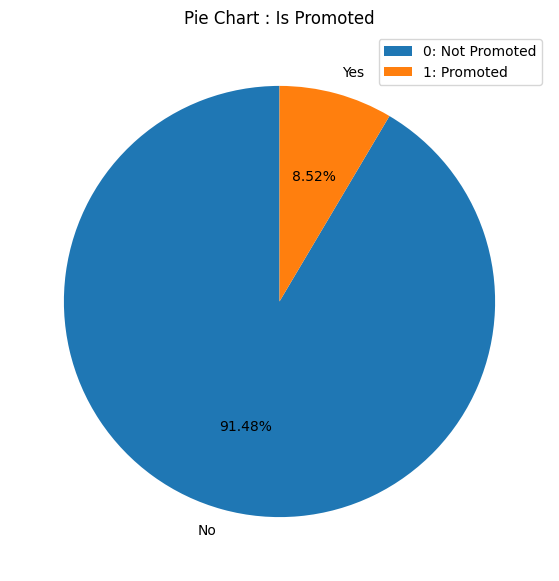

In [ ]:
is_promoted = y.value_counts()
is_promoted.plot.pie(figsize=(10,7), autopct='%.2F%%',startangle=90)

L = plt.legend()
L.get_texts()[0].set_text('0: Not Promoted')
L.get_texts()[1].set_text('1: Promoted')

plt.axis('off')
plt.title('Pie Chart : Is Promoted')

plt.show()

''' Terlihat data yang tidak seimbang antara kategori Yes dengan kategori No'''
print()

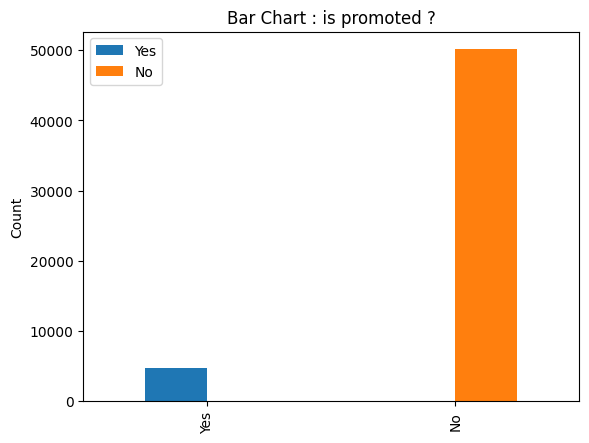

In [ ]:
is_promoted_yes = y_yes.value_counts()
is_promoted_no = y_no.value_counts()

data_new = pd.concat([is_promoted_yes, is_promoted_no], keys=['Yes','No'], axis=1)

#data_new.plot.bar() #bisa pakai cara 1
data_new.plot(kind='bar') # bisa pakai cara 2


plt.title('Bar Chart : is promoted ?')
plt.ylabel('Count')


plt.show()

In [ ]:
import plotly.graph_objects as go

is_promoted_yes = y_yes.value_counts()
is_promoted_no = y_no.value_counts()
data_new_count= [is_promoted_yes[0],is_promoted_no[0]]
labels = ['Yes', 'No']

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=labels, y=data_new_count,
            text=data_new_count,
            textposition='auto',
        )])
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig.show()

##Independent Variable

### Numerical Feature
1. Comparison
2. Distribution
3. Relation

#### COMPARISON


##### 1. Number of Trainings

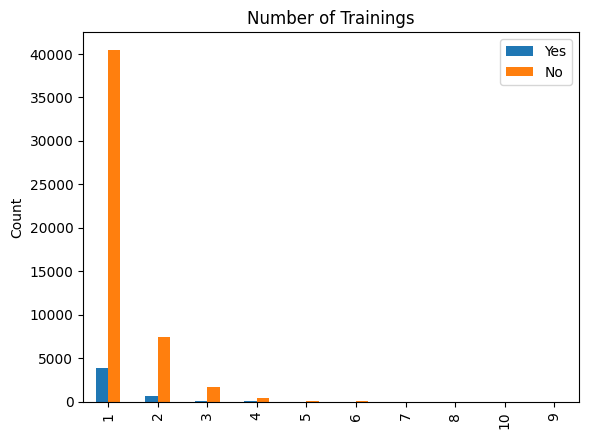

In [ ]:
no_trainings_yes = x_yes['no_of_trainings'].value_counts()
no_trainings_no = x_no['no_of_trainings'].value_counts()

data_new = pd.concat([no_trainings_yes, no_trainings_no],keys=['Yes','No'], axis=1)

#data_new.plot.bar() #bisa pakai cara 1
data_new.plot(kind='bar') # bisa pakai cara 2


plt.title('Number of Trainings')
plt.ylabel('Count')

plt.show()

#####  Age, Length of Service, dan Average Training Score

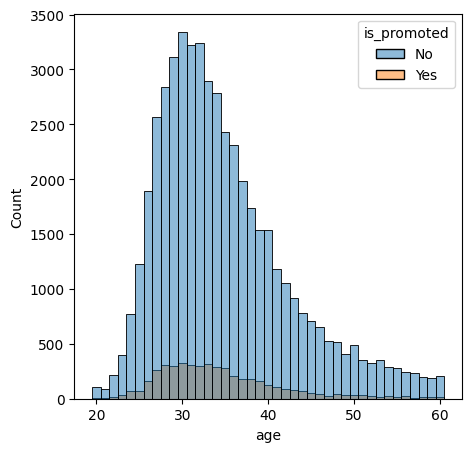

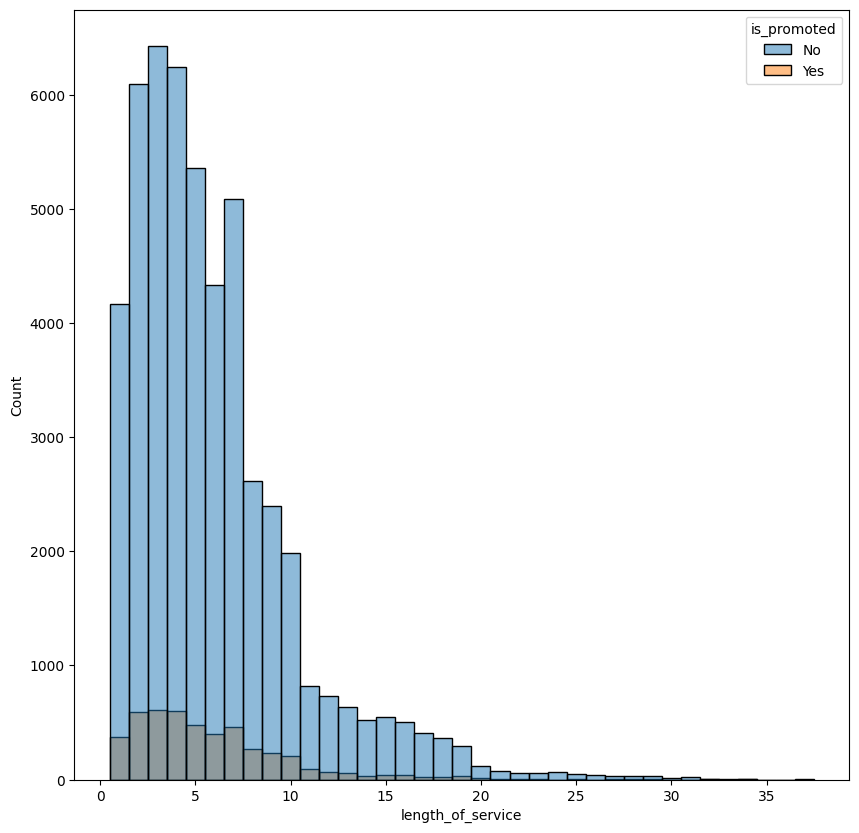

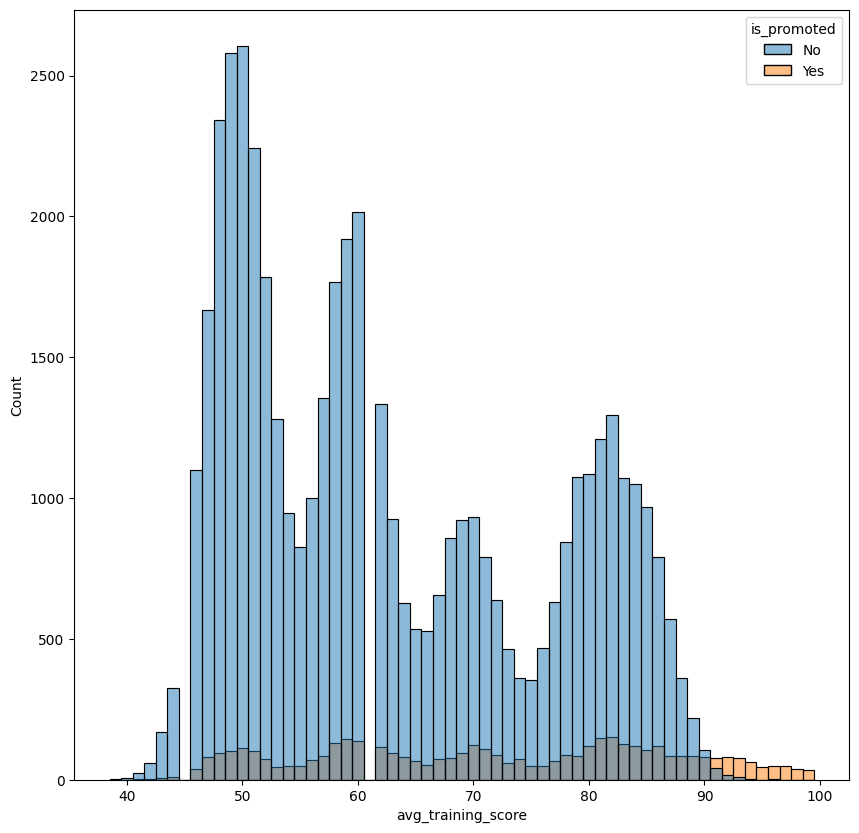

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data, x = 'age', hue = 'is_promoted', discrete= True, kde = False)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(data, x = 'length_of_service', hue = 'is_promoted', discrete= True, kde = False)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(data, x = 'avg_training_score', hue = 'is_promoted', discrete= True, kde = False)
plt.show()

#### DISTRIBUTION

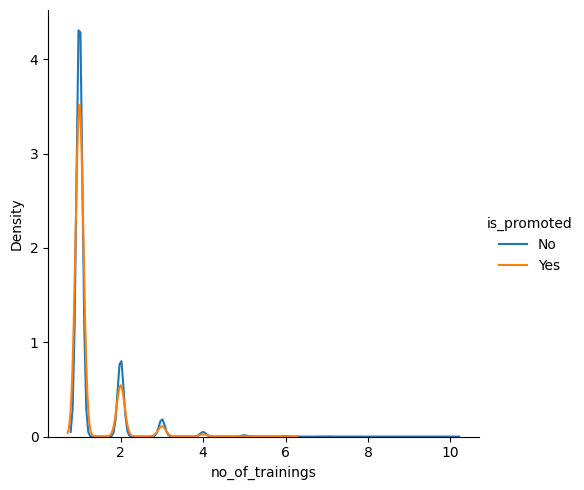

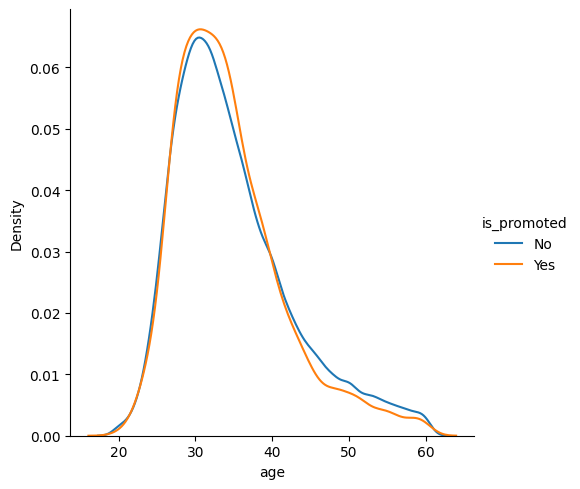

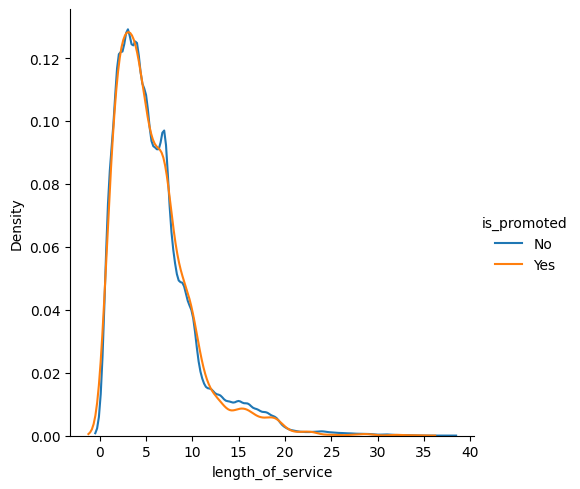

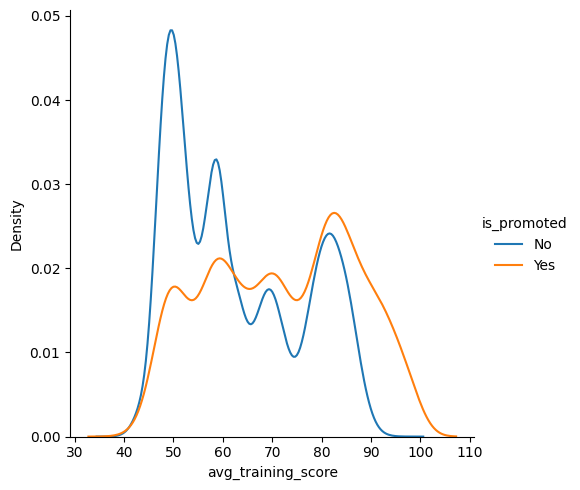

In [ ]:
sns.FacetGrid(data, hue = 'is_promoted', height = 5).map(sns.kdeplot, 'no_of_trainings').add_legend()
plt.show()

sns.FacetGrid(data, hue = 'is_promoted', height = 5).map(sns.kdeplot, 'age').add_legend()
plt.show()

sns.FacetGrid(data, hue = 'is_promoted', height = 5).map(sns.kdeplot, 'length_of_service').add_legend()
plt.show()

sns.FacetGrid(data, hue = 'is_promoted', height = 5).map(sns.kdeplot, 'avg_training_score').add_legend()
plt.show()

no_of_trainings, age, dan length_of_service kurvanya berhimpitan dan rata-mempunyai puncak yg sama (rata-ratanya mirip/ bahkan sama). Feature berpotensi untuk dihilangkan.


avg_training_score walaupun kurvanya berhimpitan, namun memiliki puncak/rata-rata yang berbeda. Feature berpotensi punya pengaruh terhadap target.

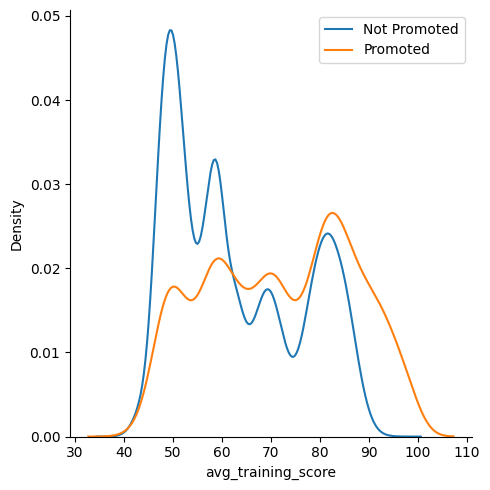

In [ ]:
sns.FacetGrid(df, hue = 'is_promoted', height = 5).map(sns.kdeplot, 'avg_training_score')
L=plt.legend()
L.get_texts()[0].set_text('Not Promoted')
L.get_texts()[1].set_text('Promoted')


plt.show()

Setelah diketahui distribusinya, akan dilakukan pengecekan terhadap data khususnya yang mempunyai pola distribusi yang saling berhimpitan dan mirip , karena kurva cenderung tidak normal dan mungkin mengandung outlier menggunakan boxplot

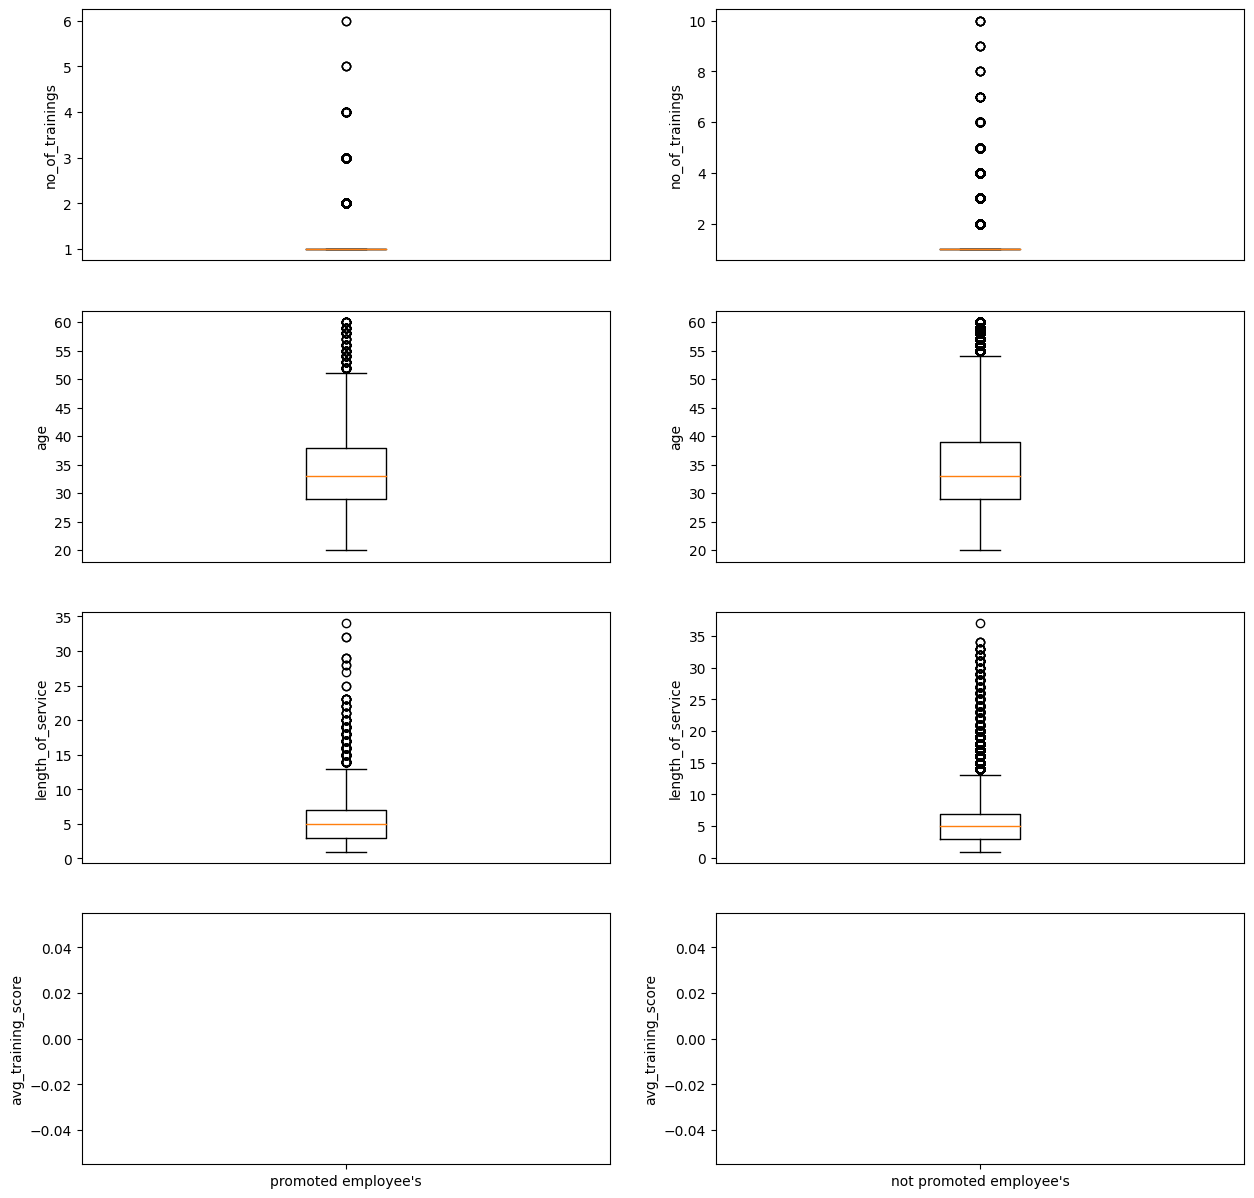

<Figure size 640x480 with 0 Axes>

In [ ]:
# Coba membuat visualisasi boxplot

plt.figure(figsize=(15,15))
plt.subplot(4, 2, 1) #2 baris, 2 kolom, plot 1
plt.boxplot(x_yes['no_of_trainings'])
plt.xticks([])
plt.ylabel('no_of_trainings')

plt.subplot(4, 2, 2) #2 baris, 2 kolom, plot 1
plt.boxplot(x_no['no_of_trainings'])
plt.xticks([])
plt.ylabel('no_of_trainings')

plt.subplot(4, 2, 3) #2 baris, 2 kolom, plot 1
plt.boxplot(x_yes['age'])
plt.xticks([])
plt.ylabel('age')

plt.subplot(4, 2, 4) #2 baris, 2 kolom, plot 1
plt.boxplot(x_no['age'])
plt.xticks([])
plt.ylabel('age')

plt.subplot(4, 2, 5) #2 baris, 2 kolom, plot 1
plt.boxplot(x_yes['length_of_service'])
plt.xticks([])
plt.ylabel('length_of_service')

plt.subplot(4, 2, 6) #2 baris, 2 kolom, plot 1
plt.boxplot(x_no['length_of_service'])
plt.xticks([])
plt.ylabel('length_of_service')

plt.subplot(4, 2, 7) #2 baris, 2 kolom, plot 1
plt.boxplot(x_yes['avg_training_score'])
plt.ylabel('avg_training_score')
plt.xticks([1],labels=["promoted employee's"])

plt.subplot(4, 2, 8) #2 baris, 2 kolom, plot 1
plt.boxplot(x_no['avg_training_score'])
plt.ylabel('avg_training_score')
plt.xticks([1],labels=["not promoted employee's"])

plt.show()
plt.savefig('plot.png', dpi = 300, bbox_inches = 'tight')


In [ ]:
# Coba mendeteksi outliers

outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(x_yes['no_of_trainings'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

#### CORRELATION

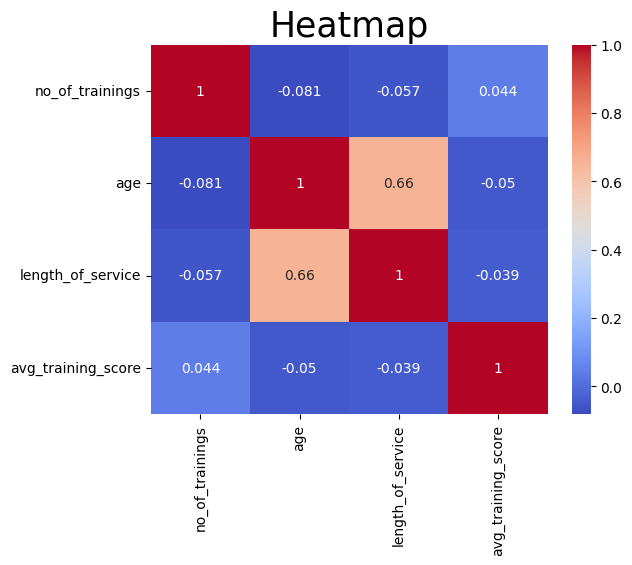

In [ ]:
data_corr = data[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']].corr()

sns.heatmap(data_corr, annot=True, cmap = 'coolwarm' )
plt.title("Heatmap", fontsize = 25);
plt.show()

### Categorical Feature
1. Composition
2. Comparison

#### COMPOSITION

#### 1. Department

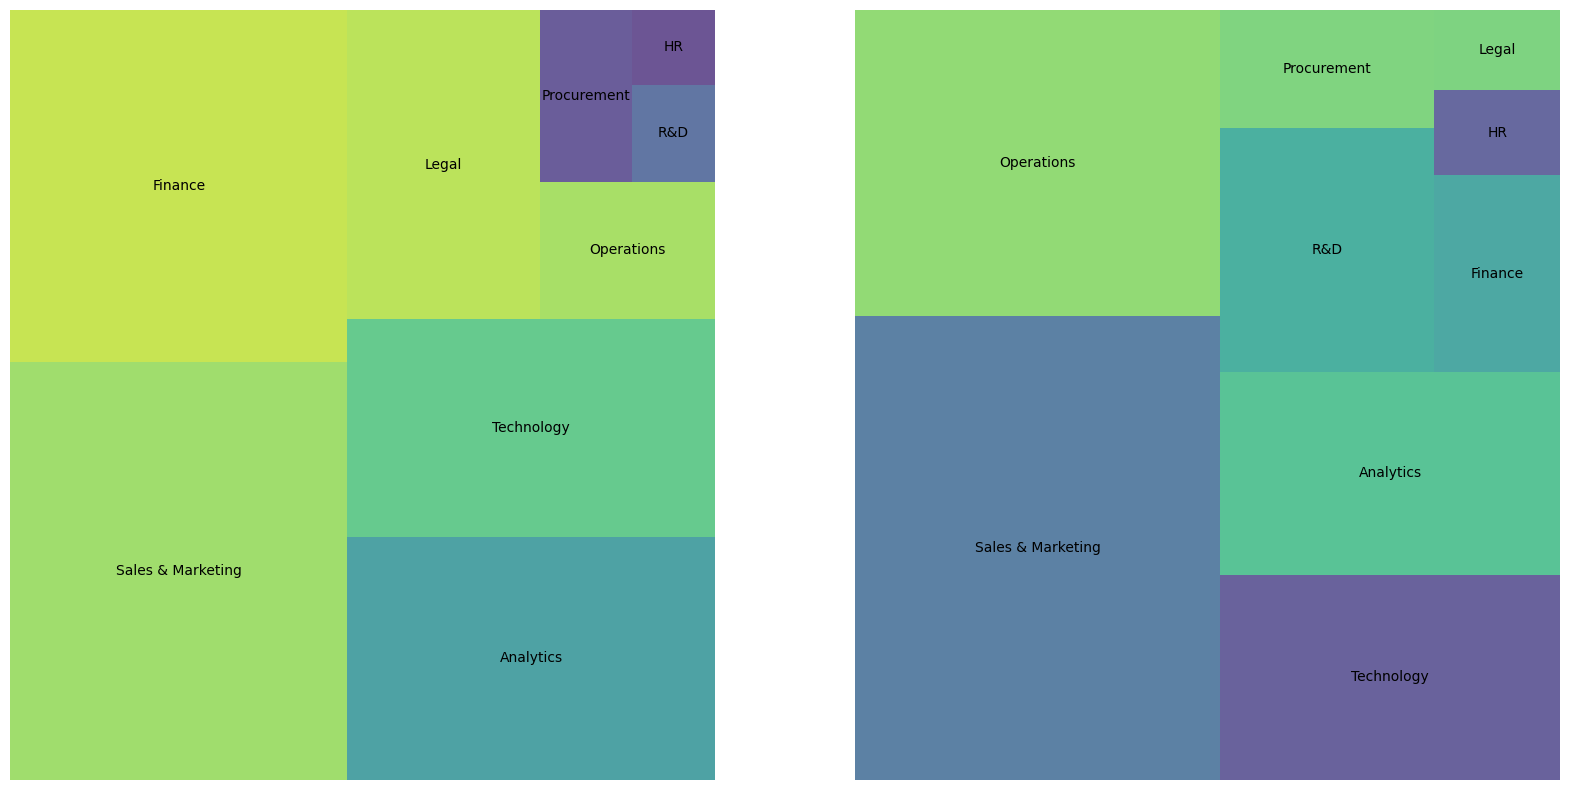

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
department_yes = x_yes['department'].value_counts()
squarify.plot(sizes=department_yes, label=x_yes['department'].unique(), alpha=.8 )
plt.axis('off')

plt.subplot(1, 2, 2)
department_no = x_no['department'].value_counts()
squarify.plot(sizes=department_no, label=x_no['department'].unique(), alpha=.8 )
plt.axis('off')
plt.show()

Departemen yang lebih banyak dipromosikan (punya peluang besar untuk dipromosikan/sering dipromosikan):
Finance, Legal

Departemen yang lebih banyak TIDAK dipromosikan (punya peluang kecil untuk dipromosikan/jarang dipromosikan): operation, R&D

Departemen lainnya cenderung memiliki komposisi yang seimbang antara karyawan yang dipromosikan dan yang tidak dipromosikan (memiliki peluang yang sama untuk dipromosikan dan tidak dipromosikan)

#### 2. Region

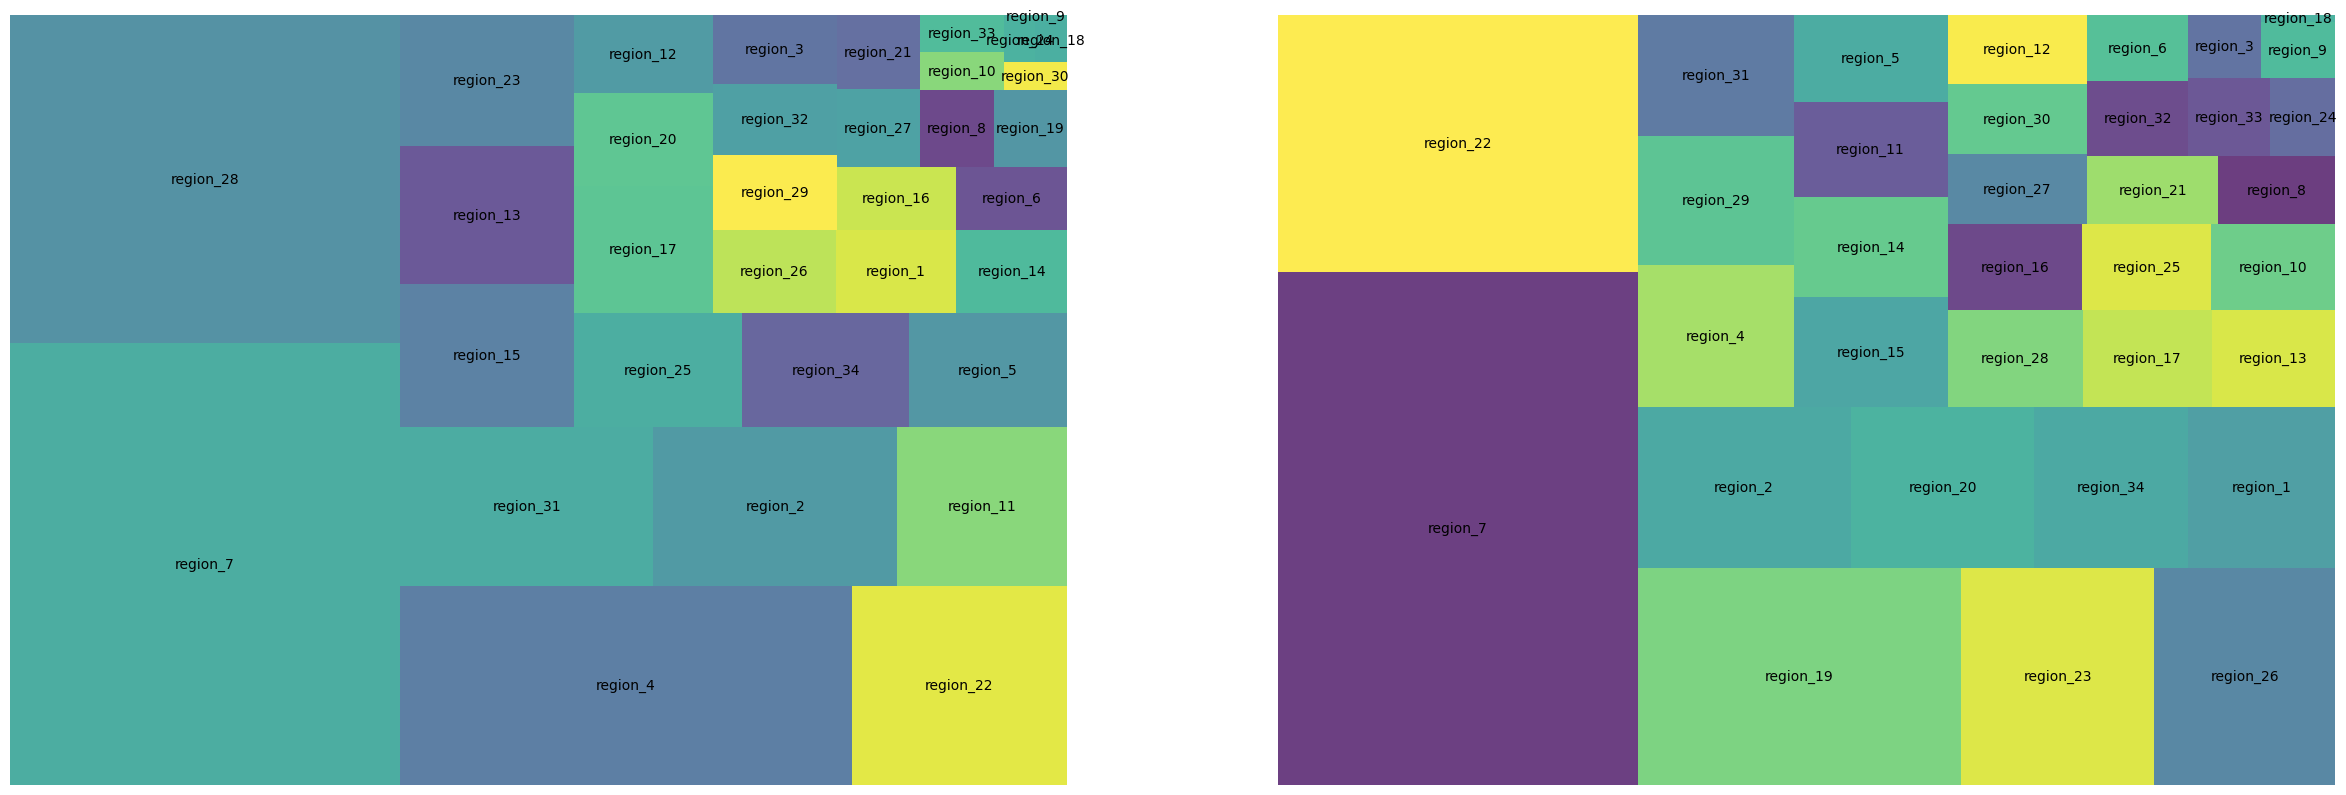

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
region_yes = x_yes['region'].value_counts()
squarify.plot(sizes=region_yes, label=x_yes['region'].unique(), alpha=.8 )
plt.axis('off')

plt.subplot(1, 2, 2)
region_no = x_no['region'].value_counts()
squarify.plot(sizes=region_no, label=x_no['region'].unique(), alpha=.8 )
plt.axis('off')
plt.show()

3 asal daerah dari karyawan yang lebih banyak dipromosikan dibanding karyawan yang tidak dipromosikan (sering dipromosikan):

Region 28, 4, 31

Kebalikannya, asal daerah yang jarang dipromosikan :  

Region 22, 19, 26



In [ ]:
x_no['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [ ]:
x_yes['previous_year_rating'].value_counts()

5.0    1921
3.0    1355
4.0     784
2.0     181
1.0      88
Name: previous_year_rating, dtype: int64

#### 3. Previous Year Rating

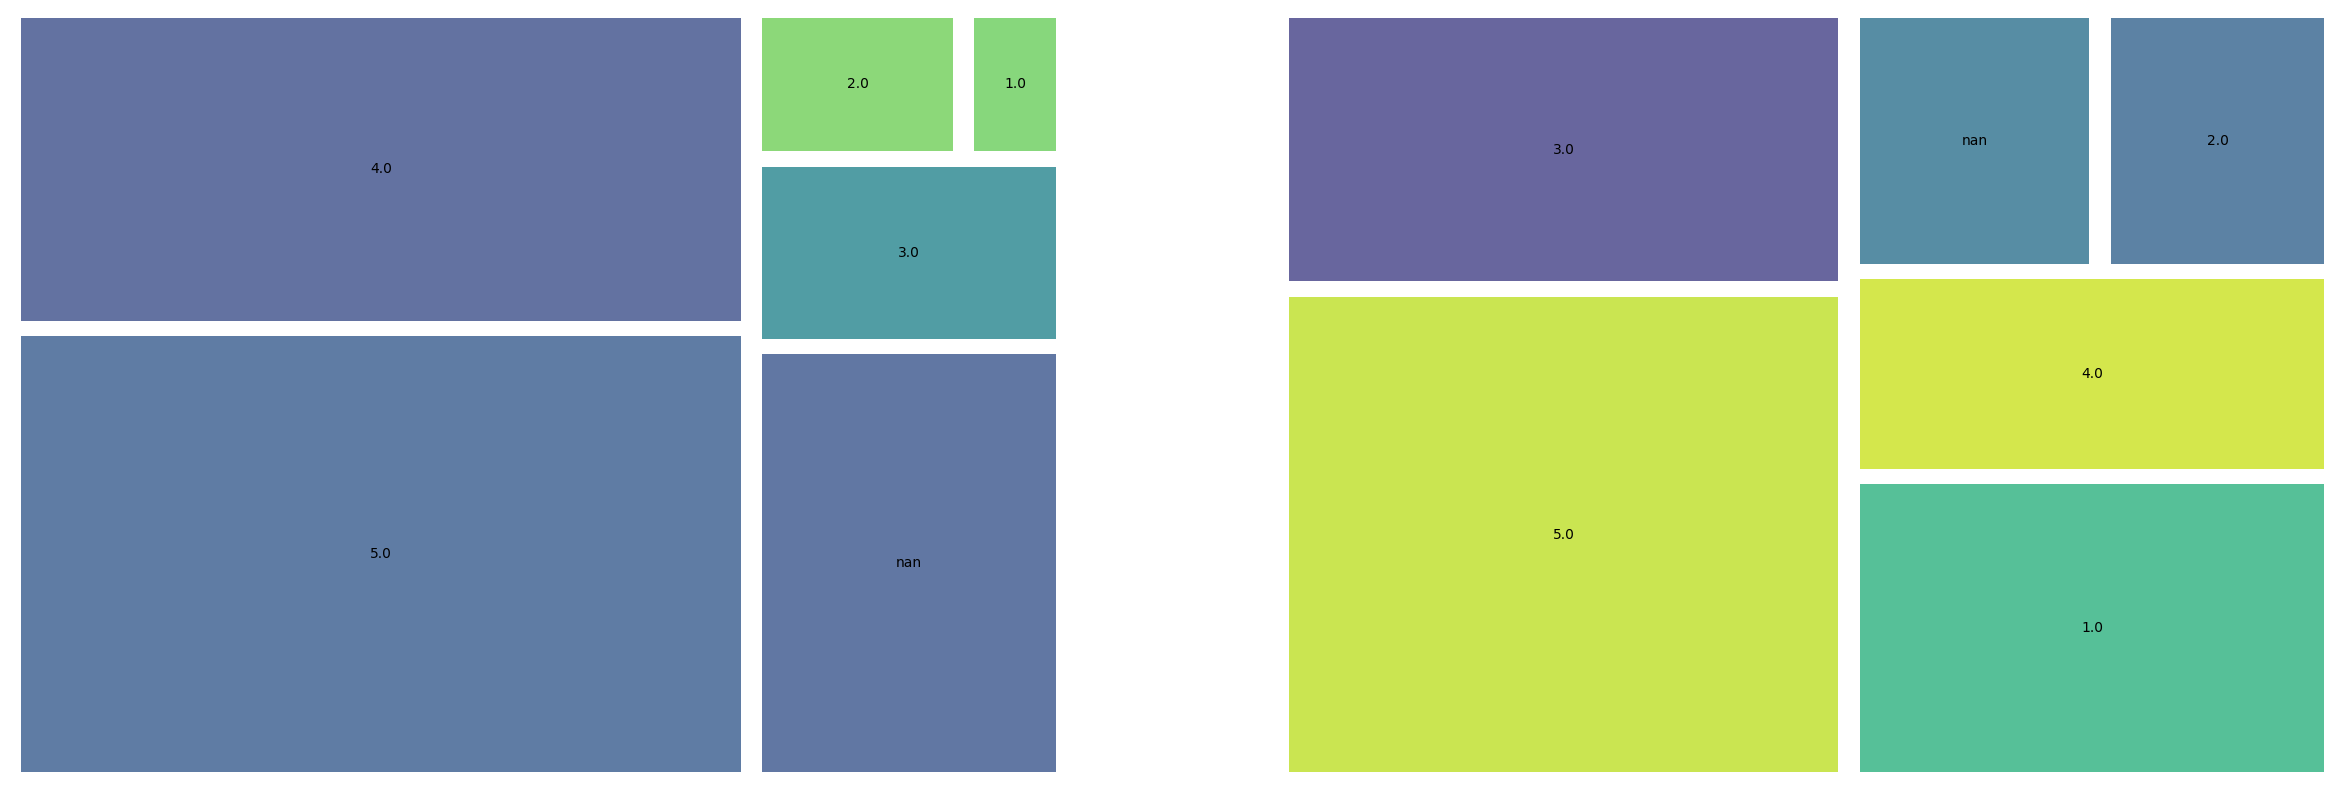

In [ ]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
pyr_yes = x_yes['previous_year_rating'].value_counts(dropna = False)
squarify.plot(sizes=pyr_yes, label=x_yes['previous_year_rating'].unique(), alpha=.8, pad = 1  )
plt.axis('off')

plt.subplot(1, 2, 2)
pyr_no = x_no['previous_year_rating'].value_counts(dropna = False)
squarify.plot(sizes=pyr_no, label=x_no['previous_year_rating'].unique(), alpha=.8, pad=1 )
plt.axis('off')
plt.show()



karyawan-karyawan yang memperoleh rating 4  cenderung mendapat promosi, diikuti oleh rating 5, NaN, dan rating 2

sedangkan karyawan-karyawan yang memperoleh rating 3 dan 1 cenderung tidak mendapat promosi


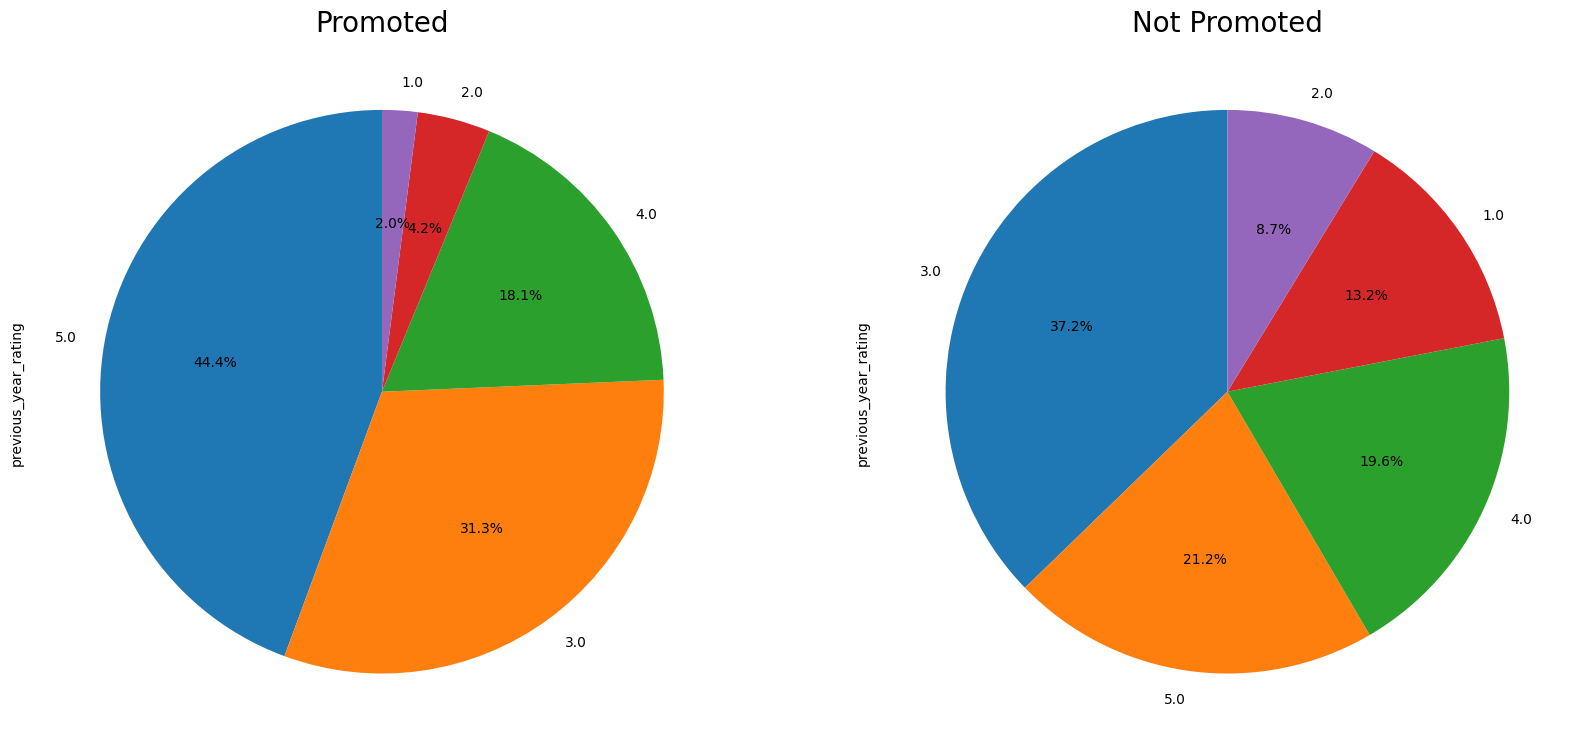

In [ ]:
plt.figure(figsize = (20,15))
plt.subplot(1, 2, 1)
pyr_yes = x_yes['previous_year_rating'].value_counts()
pyr_yes.plot.pie(autopct='%.1F%%', startangle=90)
plt.title("Promoted", {'fontsize':20})


plt.subplot(1, 2, 2)
pyr_no = x_no['previous_year_rating'].value_counts()
pyr_no.plot.pie( autopct='%.1F%%', startangle=90)
plt.title("Not Promoted", {'fontsize':20})
plt.show()

# Pada treemap, missing value akan ditampilkan dalam kotak tersendiri. Namun dalam pie chart, missing value akan diagregat menjadi 0% (tidak akan ditampilkan)

#### Education, Gender, Recruitment Channel, dan Awards Won

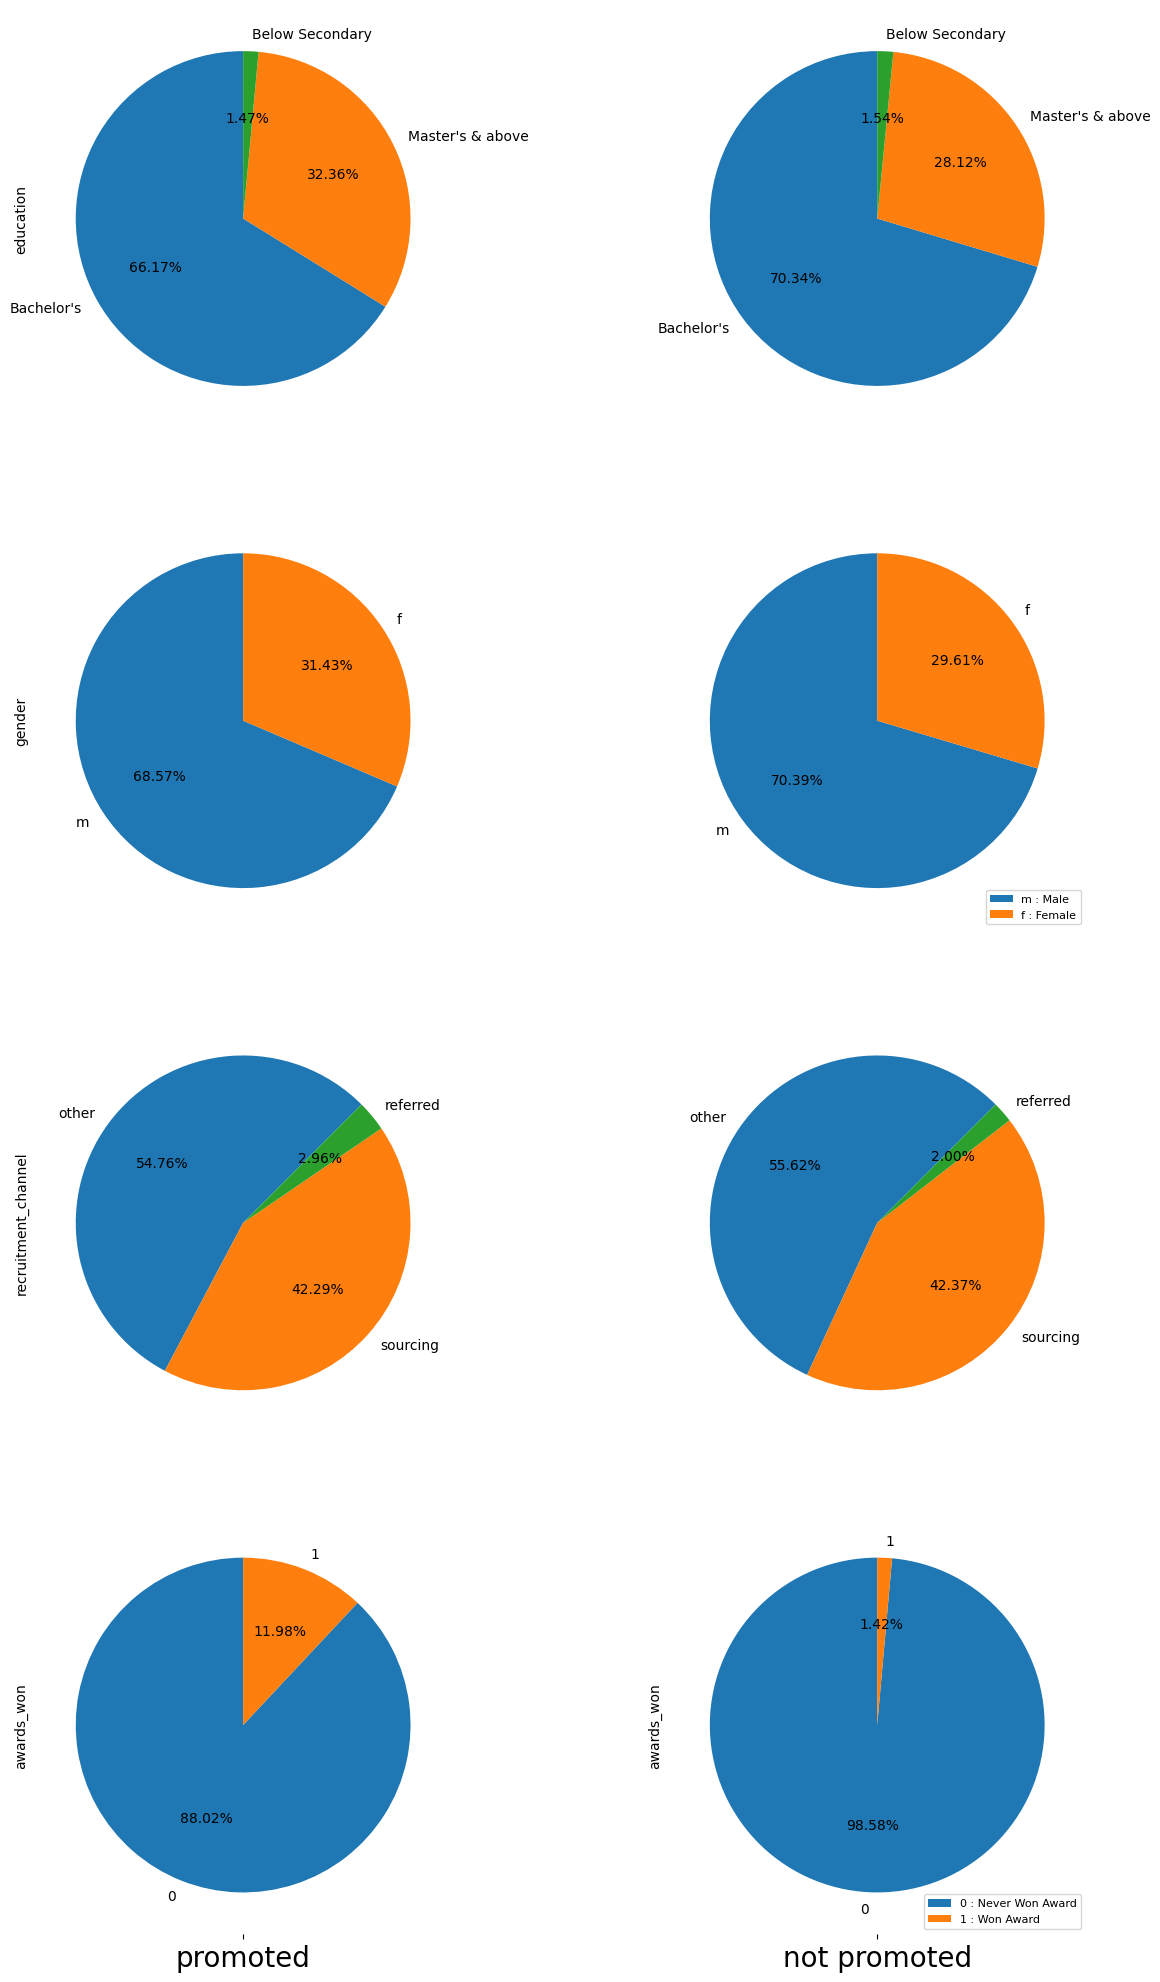

In [ ]:
plt.figure(figsize=(15,25)).tight_layout()
plt.subplot(4, 2, 1)
education_yes = x_yes['education'].value_counts()
education_yes.plot.pie(autopct='%.2F%%', startangle=90)

plt.subplot(4, 2, 2)
education_no = x_no['education'].value_counts()
education_no.plot.pie( autopct='%.2F%%', startangle=90)
plt.axis('off')

plt.subplot(4, 2, 3)
gender_yes = x_yes['gender'].value_counts()
gender_yes.plot.pie(autopct='%.2F%%', startangle=90)

plt.subplot(4, 2, 4)
gender_no = x_no['gender'].value_counts()
gender_no.plot.pie( autopct='%.2F%%', startangle=90)
plt.axis('off')
L = plt.legend( prop={'size': 8}, loc="lower right")
L.get_texts()[0].set_text('m : Male')
L.get_texts()[1].set_text('f : Female')


plt.subplot(4, 2, 5)
recruitment_channel_yes = x_yes['recruitment_channel'].value_counts()
recruitment_channel_yes.plot.pie(autopct='%.2F%%', startangle=45)

plt.subplot(4, 2, 6)
recruitment_channel_no = x_no['recruitment_channel'].value_counts()
recruitment_channel_no.plot.pie( autopct='%1.2F%%', startangle=45)
plt.axis('off')

plt.subplot(4, 2, 7)
awards_yes = x_yes['awards_won'].value_counts()
awards_yes.plot.pie(autopct='%1.2F%%', startangle=90)
plt.xticks([0],labels=["promoted"], fontsize=20)

plt.subplot(4, 2, 8)
awards_no = x_no['awards_won'].value_counts()
awards_no.plot.pie( autopct='%.2F%%', startangle=90)
plt.xticks([0],labels=["not promoted"], fontsize=20)
L = plt.legend( prop={'size': 8}, loc="lower right")
L.get_texts()[0].set_text('0 : Never Won Award')
L.get_texts()[1].set_text('1 : Won Award')


plt.show()


**Education**

pada tingkat master keatas, cenderung lebih banyak yang dipromosikan. Sedangkan untuk below secondary dan bachelor cenderung lebih banyak yang tidak dipromosikan

**Awards won**

karyawan-karyawan yang pernah memperoleh penghargaan memiliki peluang besar untuk dipromosikan

**Gender dan Recruitment channel**

 tidak memiliki kecenderungan yang berarti


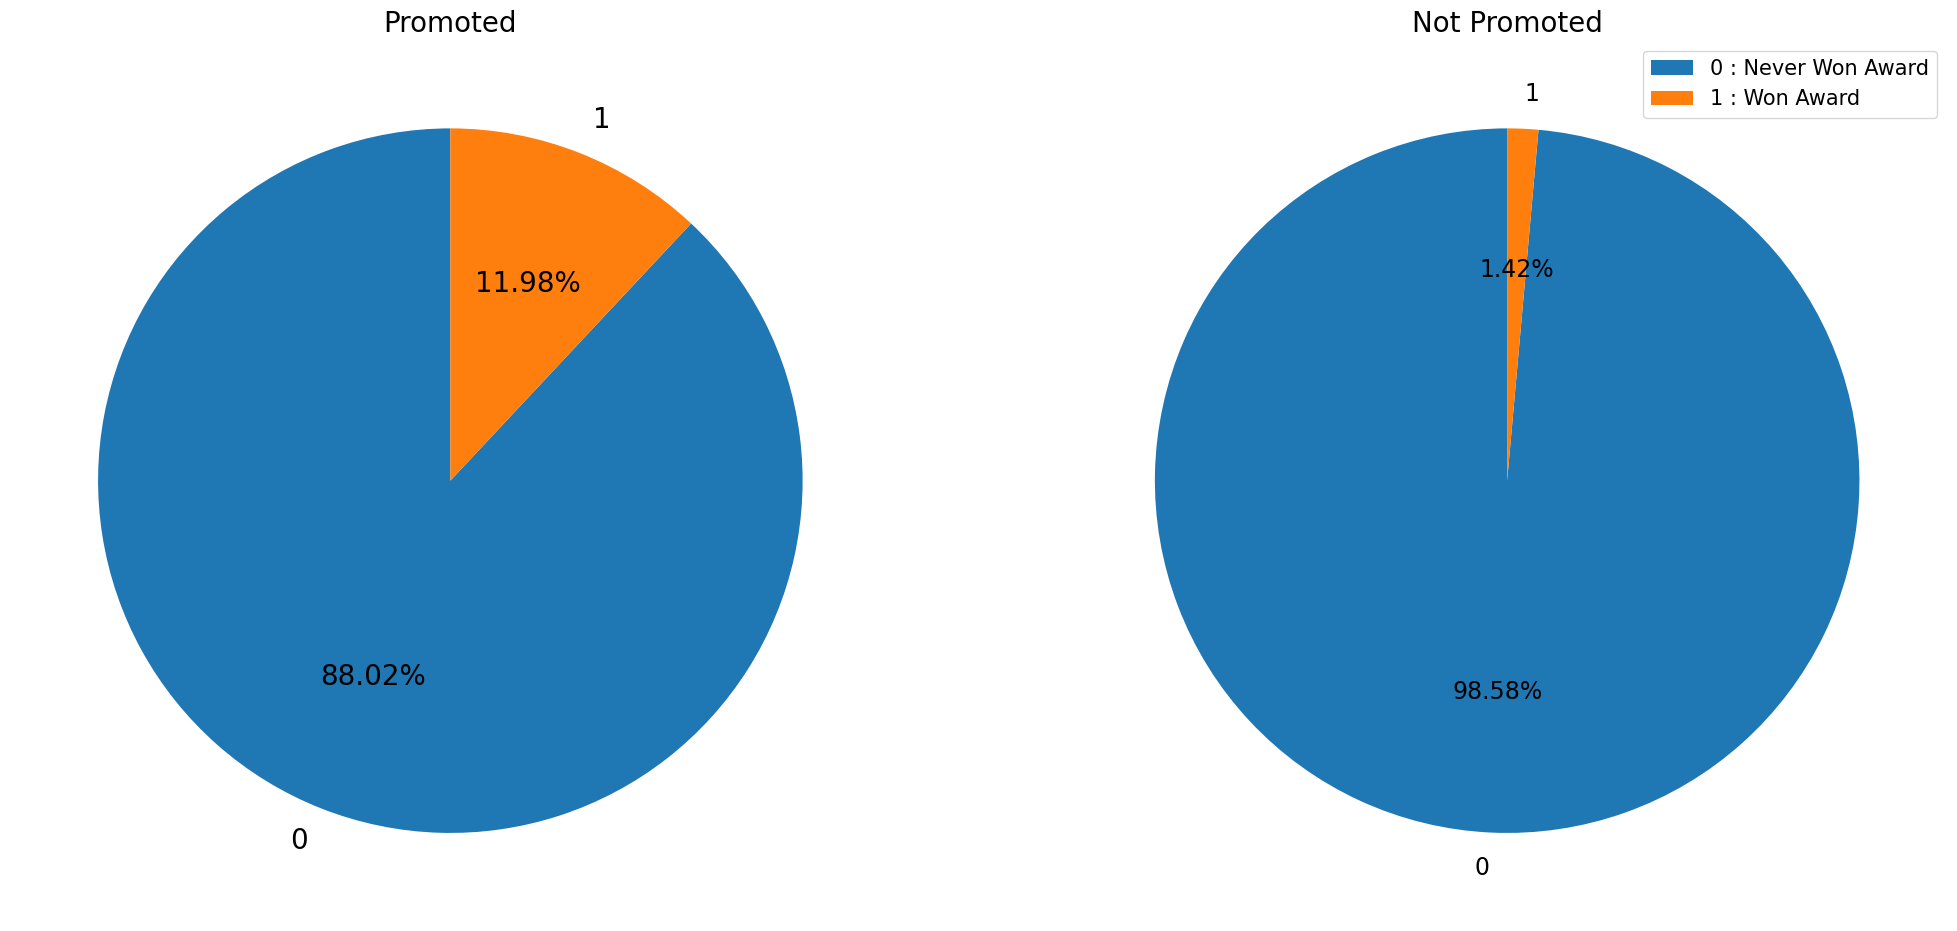

In [ ]:
# Pie plot tambahan (untuk lebih jelas)
plt.figure(figsize=(25,15))
plt.subplot(1, 2, 1)
awards_yes = x_yes['awards_won'].value_counts()
awards_yes.plot.pie(autopct='%1.2F%%', startangle=90, textprops={'fontsize': 20})
plt.axis('off')
plt.title("Promoted", {'fontsize':20})

plt.subplot(1, 2, 2)
awards_no = x_no['awards_won'].value_counts()
awards_no.plot.pie( autopct='%1.2F%%', startangle=90, textprops={'fontsize': 17})
plt.axis('off')
L = plt.legend( prop={'size': 15})
L.get_texts()[0].set_text('0 : Never Won Award')
L.get_texts()[1].set_text('1 : Won Award')

plt.title("Not Promoted", {'fontsize':20})
plt.show()

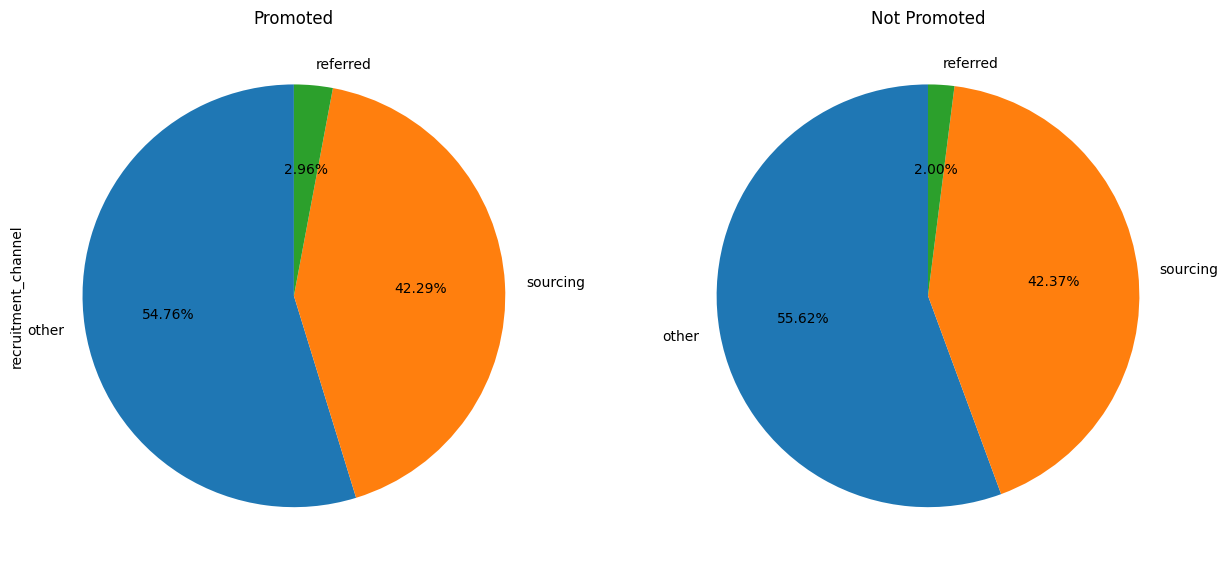

In [ ]:
# Pie plot tambahan (untuk diperjelas)
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
awards_yes = x_yes['recruitment_channel'].value_counts()
awards_yes.plot.pie(autopct='%1.2F%%', startangle=90)
plt.title("Promoted")

plt.subplot(1, 2, 2)
awards_no = x_no['recruitment_channel'].value_counts()
awards_no.plot.pie( autopct='%1.2F%%', startangle=90)
plt.axis('off')
plt.title("Not Promoted")
plt.show()

In [ ]:
X_cat.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'previous_year_rating', 'awards_won'],
      dtype='object')

#### COMPARISON

In [ ]:
# Membuat data baru berisi count untuk masing-masing variabel

department_yes = x_yes['department'].value_counts()
department_no = x_no['department'].value_counts()

data_new1 = pd.concat([department_yes, department_no], keys=['Yes','No'], axis=1)

region_yes = x_yes['region'].value_counts()
region_no = x_no['region'].value_counts()

data_new2 = pd.concat([region_yes, region_no], keys=['Yes','No'], axis=1)

previous_year_rating_yes = x_yes['previous_year_rating'].value_counts()
previous_year_rating_no = x_no['previous_year_rating'].value_counts()

data_new3 = pd.concat([previous_year_rating_yes, previous_year_rating_no], keys=['Yes','No'], axis=1)

education_yes = x_yes['education'].value_counts()
education_no = x_no['education'].value_counts()

data_new5 = pd.concat([education_yes, education_no], keys=['Yes','No'], axis=1)

gender_yes = x_yes['gender'].value_counts()
gender_no = x_no['gender'].value_counts()

data_new6 = pd.concat([gender_yes, gender_no], keys=['Yes','No'], axis=1)

recruitment_channel_yes = x_yes['recruitment_channel'].value_counts()
recruitment_channel_no = x_no['recruitment_channel'].value_counts()

data_new7 = pd.concat([recruitment_channel_yes, recruitment_channel_no], keys=['Yes','No'], axis=1)

awards_won_yes = x_yes['awards_won'].value_counts()
awards_won_no = x_no['awards_won'].value_counts()

data_new8 = pd.concat([awards_won_yes, awards_won_no], keys=['Yes','No'], axis=1)



**Department and Region**

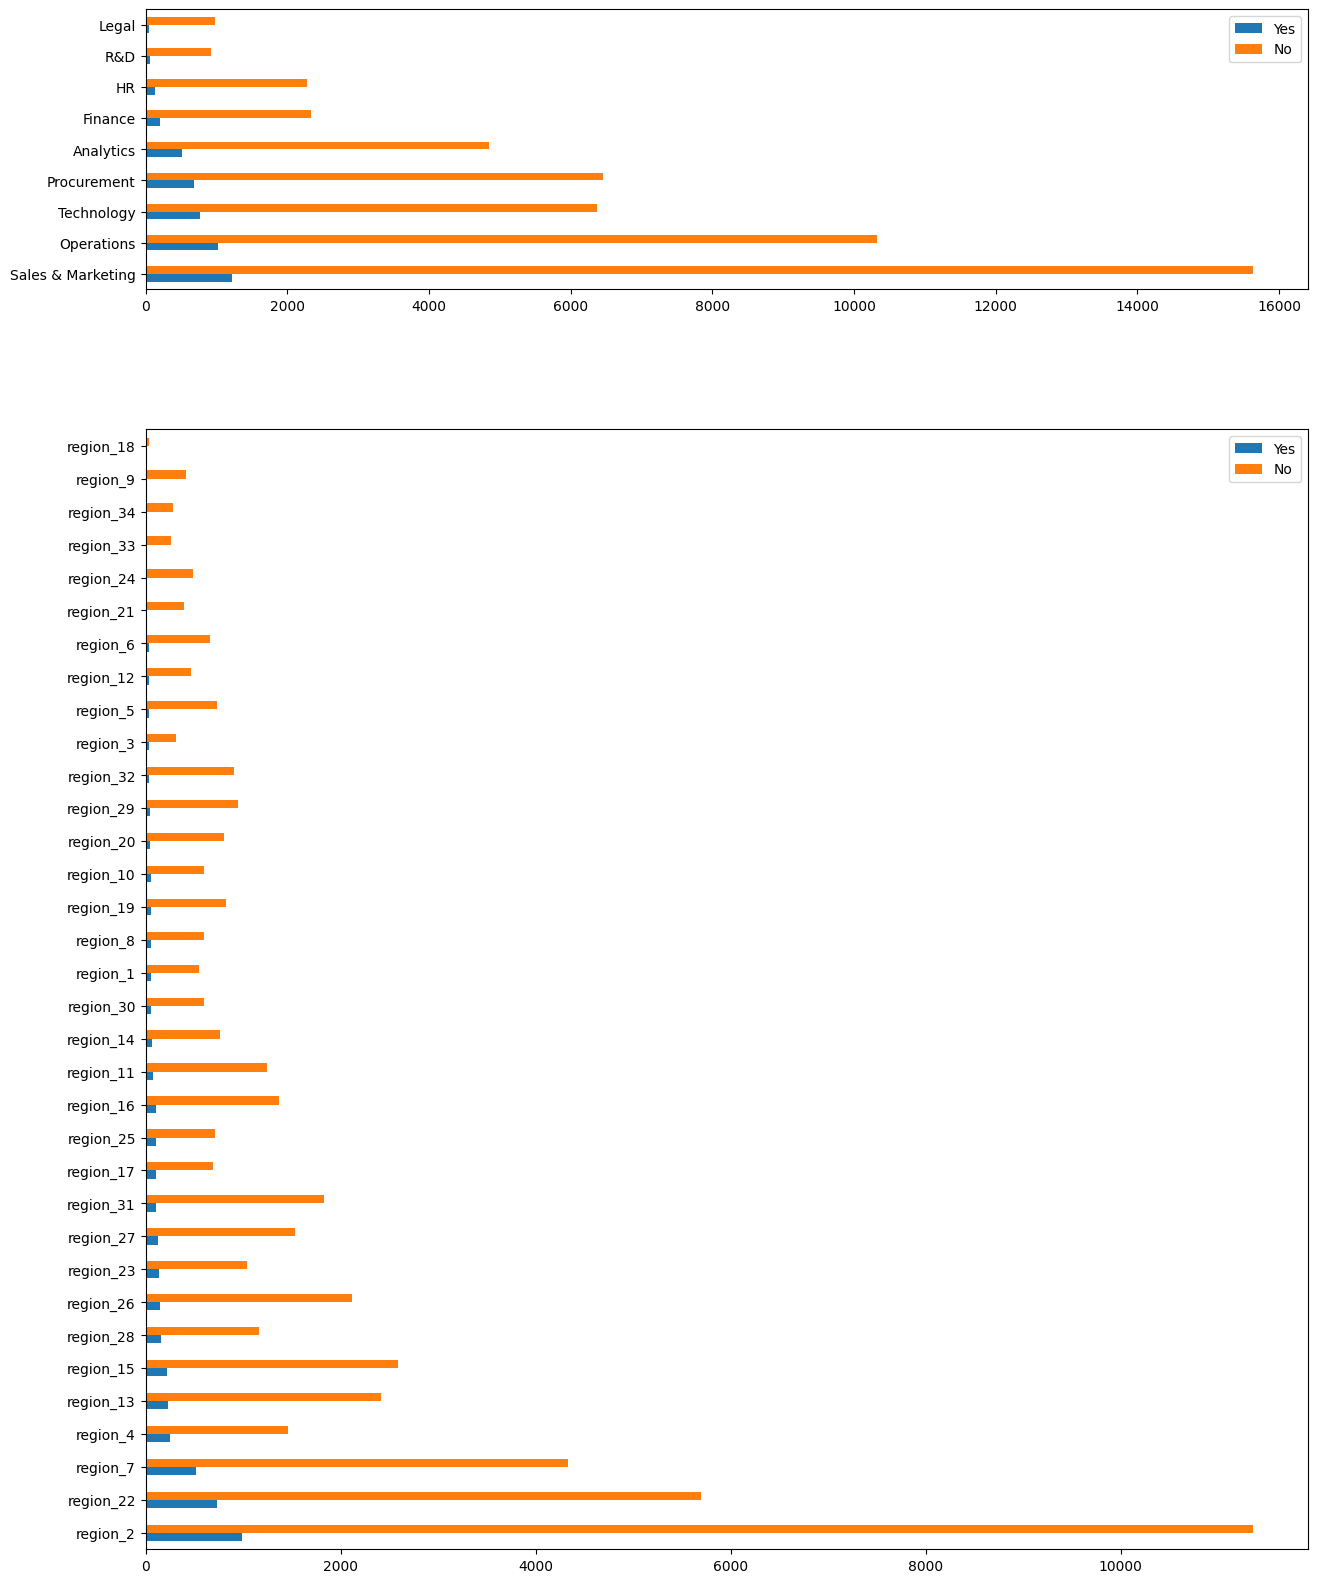

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 20),  gridspec_kw={'height_ratios': [1, 4]})

data_new1.plot(kind='barh',ax=ax1)
data_new2.plot(kind='barh',ax=ax2)

plt.show()

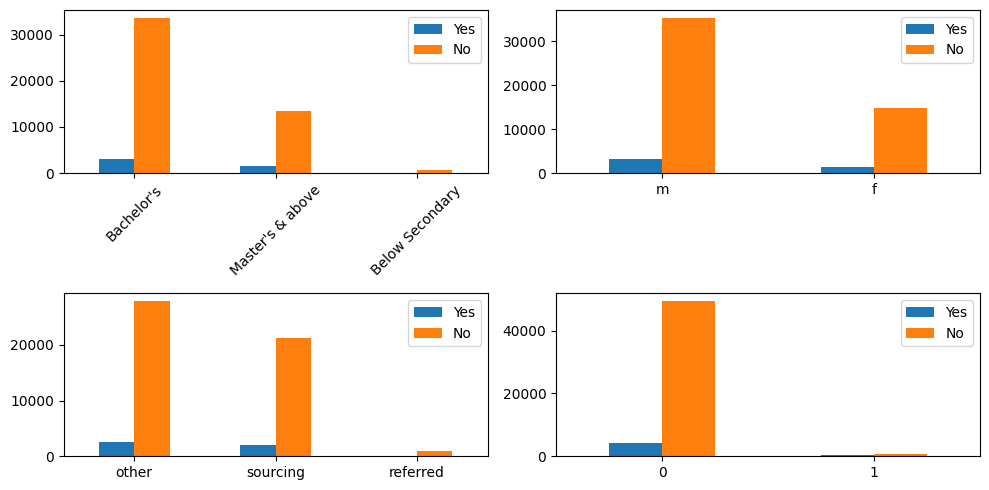

<Axes: >

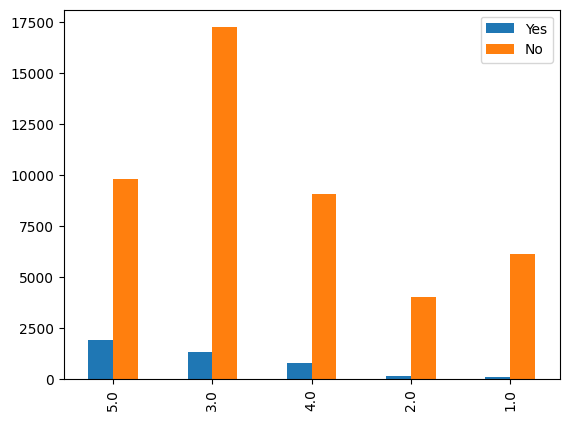

In [ ]:
fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, figsize = (10, 5))
data_new5.plot(kind='bar',ax=ax5, rot = 45)
data_new6.plot(kind='bar',ax=ax6, rot = 0)
data_new7.plot(kind='bar',ax=ax7, rot = 0)
data_new8.plot(kind='bar',ax=ax8, rot = 0)

fig.tight_layout() # untuk menyesuaikan jarak antar plot scr otomatis
plt.show()
data_new3.plot(kind='bar')

<Axes: >

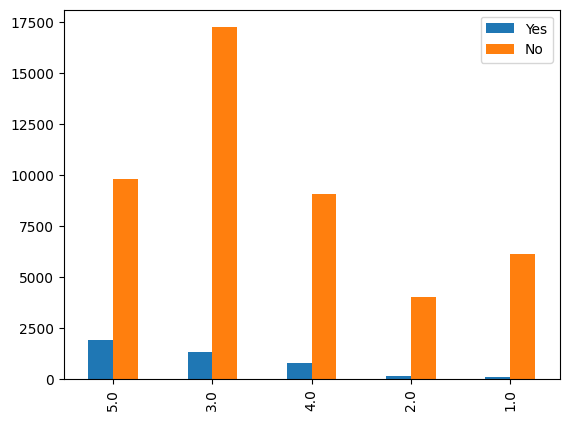

In [ ]:
data_new3.plot(kind='bar')


#DATA PREPOCESSING

##Data Cleansing

###1. Drop Duplicates

In [ ]:
df.drop_duplicates()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


###2. Handling Missing Values

In [ ]:
# Number of cases with NaN
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


#### Data Imputation

##### avg_trainning_score

In [ ]:
# Missing Values (avg_training_score)
df.loc[df['avg_training_score'].isnull(), 'avg_training_score'] = df['avg_training_score'].median()

##### education

In [ ]:
# Missing Values (education)
df_education = df['education']
df_education.isnull().sum()

2409

In [ ]:
df_education = df_education.fillna(df_education.mode()[0])

In [ ]:
df['education'] = df_education.values

##### previous_year_rating

In [ ]:
# Missing Values (previous_year_rating)
df_year_rating = df['previous_year_rating']
df_year_rating.isnull().sum()

4124

In [ ]:
df_year_rating = df_year_rating.fillna(df_year_rating.mode()[0])
df_year_rating.isnull().sum()

0

In [ ]:
df['previous_year_rating'] = df_year_rating.values

### Other Preparation

#### Mendefinisikan Variabel Dependen dan Independent

In [ ]:
# Dependent Variable
y = df['is_promoted']
y_no = y[y==0]
y_yes = y[y==1]

# Independent Variable
x = df.drop(['employee_id', 'is_promoted'], axis = 1)
x_no = df[df['is_promoted']==0].drop(['employee_id', 'is_promoted'], axis = 1)
x_yes = df[df['is_promoted']==1].drop(['employee_id', 'is_promoted'], axis = 1)


In [ ]:
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,60.0,0


#### Delete Columns ID

In [ ]:
df = df.drop(['employee_id'], axis = 1)
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['region'] = label.fit_transform(df['region'])

In [ ]:
df['department'] = label.fit_transform(df['department'])

In [ ]:
df['education'] = label.fit_transform(df['education'])

In [ ]:
df['gender'] = label.fit_transform(df['gender'])

In [ ]:
df['recruitment_channel'] = label.fit_transform(df['recruitment_channel'])

In [ ]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,8,18,0,1,0,1,45,3.0,2,0,73.0,0


## Feature Selection

### Numerical Feature

#### Using ANOVA Testing

In [ ]:
X_num = df[['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']]

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif

In [ ]:
MIC_anova = SelectKBest(score_func=f_classif, k='all')

In [ ]:
MIC_anova.fit(X_num, y)

SelectKBest(k='all')

In [ ]:
feature_MI_pvalue = pd.Series(MIC_anova.pvalues_, index = X_num.columns)
feature_MI_pvalue.round(4).sort_values(ascending = False)

length_of_service     0.0125
age                   0.0001
no_of_trainings       0.0000
avg_training_score    0.0000
dtype: float64

Berdasarkan p-value yang diperoleh dari pengujian ANOVA di atas, maka dapat disimpulkan bahwa semua variabel numerik yang akan digunakan ternyata mempunyai pengaruh yang signifikan terhadap dipromosikan/tidaknya karyawan.

### Categorical Feature

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


In [ ]:
# df Kategorik
X_cat = df[['department', 'region', 'education','gender','recruitment_channel','previous_year_rating','awards_won' ]].astype("category")

In [ ]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   department            54808 non-null  category
 1   region                54808 non-null  category
 2   education             54808 non-null  category
 3   gender                54808 non-null  category
 4   recruitment_channel   54808 non-null  category
 5   previous_year_rating  54808 non-null  category
 6   awards_won            54808 non-null  category
dtypes: category(7)
memory usage: 377.2 KB


#### Using Chi-Squared Test

In [ ]:
chi_scores = chi2(X_cat, y)
chi_scores

(array([1.17185904e-03, 2.13326122e+01, 6.63563252e+01, 2.01311313e+00,
        3.01599472e-01, 5.74656810e+02, 2.05400931e+03]),
 array([9.72691809e-001, 3.86106847e-006, 3.76349265e-016, 1.55945032e-001,
        5.82881429e-001, 5.44932210e-127, 0.00000000e+000]))

In [ ]:
nilai_chi = pd.Series(chi_scores[0], index = X_cat.columns)
nilai_chi

department                 0.001172
region                    21.332612
education                 66.356325
gender                     2.013113
recruitment_channel        0.301599
previous_year_rating     574.656810
awards_won              2054.009313
dtype: float64

In [ ]:
p_value = pd.Series(chi_scores[1], index = X_cat.columns)
p_value.round(4).sort_values()

region                  0.0000
education               0.0000
previous_year_rating    0.0000
awards_won              0.0000
gender                  0.1559
recruitment_channel     0.5829
department              0.9727
dtype: float64

<Axes: >

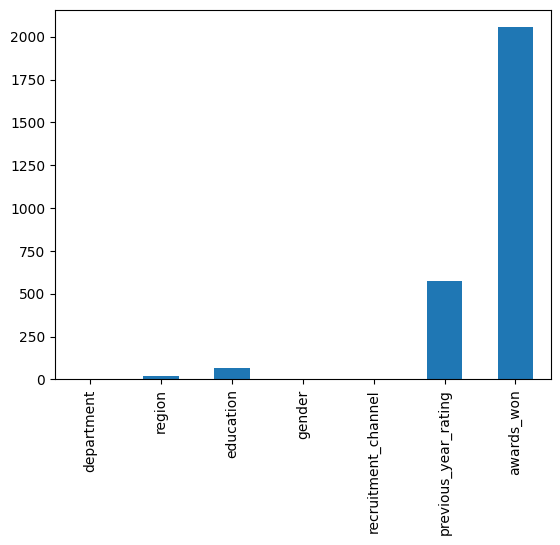

In [ ]:
nilai_chi.plot.bar()

Berdasarkan nilai chi-squared serta p-value yang dihasilkan, dapat diambil kesimpulan bahwa dari 7 variabel kategori yang diuji signifikansi terhadap variabel target, diperoleh ternyata berdasarkan uji chi-squared hanya ada 4 variabel yang signifikan berpengaruh terhadap dipromosikan/tidaknya karyawan tersebut.

variabel tersebut di antaranya awards_won, previous_year_rating, education, dan region

#### Using Mutual Information

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
MIC = SelectKBest(score_func=mutual_info_classif, k='all') # all : tidak langsung menyeleksi feature

In [ ]:
MIC.fit(X_cat, y)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x7fb67e95b370>)

In [ ]:
feature_MI_scores = pd.Series(MIC.scores_, index = X_cat.columns)
feature_MI_scores.sort_values(ascending = False)

previous_year_rating    0.017146
awards_won              0.011371
gender                  0.011020
region                  0.005915
recruitment_channel     0.003463
department              0.002686
education               0.001577
dtype: float64

<Axes: >

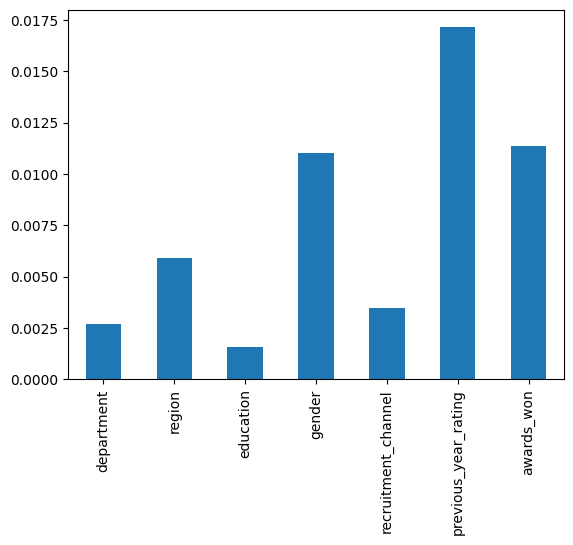

In [ ]:
feature_MI_scores.plot.bar()

Namun, jika mengacu pada hasil mutual information kita memperoleh hasil yang sedikit berbeda. Dengan mengambil 4 skor mutual information yang tertinggi, maka kita akan memperoleh feature yang paling berpengaruh signifikan terhadap dipromosikan/tidaknya karyawan adalah :
previous_year_rating, awards_won, region dan (gender)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['is_promoted', 'department', 'gender', 'recruitment_channel'  ], axis=1)
y = df['is_promoted']

## Imbalanced

In [ ]:
# Handling imbalance df
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state=43, sampling_strategy=1)

In [ ]:
# Fit the over sampling
X, y = oversampling.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 12)

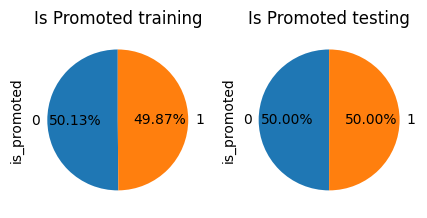

In [ ]:
is_promoted_training = y_train.value_counts()
is_promoted_testing = y.value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 20))
is_promoted_training.plot.pie(figsize=(5,5), autopct='%.2F%%', startangle=90, ax = ax1)

ax1.set_title('Is Promoted training')

is_promoted_testing.plot.pie(figsize=(5,5), autopct='%.2F%%', startangle=90, ax = ax2)

ax2.set_title('Is Promoted testing')
plt.show()


## Scaling

In [ ]:
# scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Tidak menggunakan fit_ karna agar menggunakan mean dan variance dari data training.
                            #Kalau pake fit_ maka data test (unseen) tidak lagi surprise

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [ ]:
X_train_scaled.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score
0,-0.511390,-0.633399,-0.333507,1.167334,1.238957,3.024615,-0.154627,-1.044333
1,-0.511390,-0.633399,-0.333507,2.527578,-0.526541,0.336018,-0.154627,-0.280495
2,1.777518,-0.633399,-0.333507,-0.056885,-0.526541,0.336018,-0.154627,-1.012492
3,-0.854727,-0.633399,-0.333507,-0.873031,-0.526541,-1.130490,-0.154627,-0.072176
4,-0.511390,-0.633399,-0.333507,0.215164,1.238957,-0.397236,-0.154627,0.447243


#CLASSIFICATION MODEL

## Import Library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

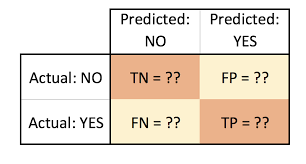

In [ ]:
# evaluation metrics
def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]

    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)

    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

## KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [ ]:
classification_eval(y_train, y_train_pred, 'KNN Training')

Evaluation Model: KNN Training
[[25613  4552]
 [ 1817 28186]]
Accuracy   : 89.41 %
Precision  : 86.1 %
Recall     : 93.94 %


In [ ]:
classification_eval(y_test, y_test_pred, 'KNN Testing')

Evaluation Model: KNN Testing
[[15649  4326]
 [ 2134 18003]]
Accuracy   : 83.9 %
Precision  : 80.63 %
Recall     : 89.4 %


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

auc_val = roc_auc_score(y_test, y_test_pred)
auc_val

0.8387276045198029

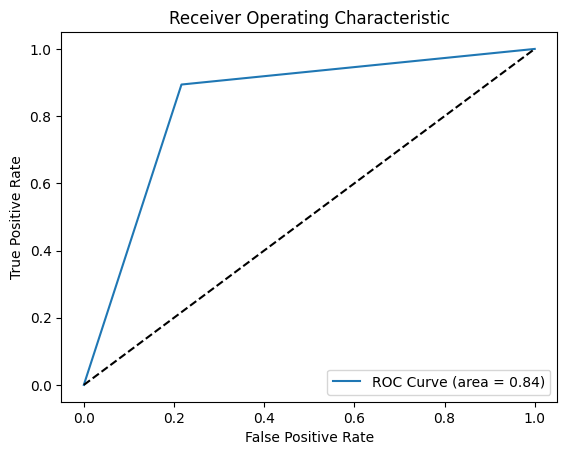

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## Decision Tree

In [ ]:
dectree = DecisionTreeClassifier() # bisa cek pake gini atau pake entropy
dectree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

In [ ]:
pd.DataFrame(y_test_pred, columns=['is_promoted'])

,is_promoted
0,1
1,1
2,1
3,1
4,1
...,...
40107,0
40108,0
40109,0
40110,1


In [ ]:
classification_eval(y_train, y_train_pred, 'Decision Tree Training')

Evaluation Model: Decision Tree Training
[[30055   110]
 [  157 29846]]
Accuracy   : 99.56 %
Precision  : 99.63 %
Recall     : 99.48 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Decision Tree Testing')

Evaluation Model: Decision Tree Testing
[[17746  2229]
 [ 1690 18447]]
Accuracy   : 90.23 %
Precision  : 89.22 %
Recall     : 91.61 %


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

auc_val = roc_auc_score(y_test, y_test_pred)
auc_val

0.9022427000826566

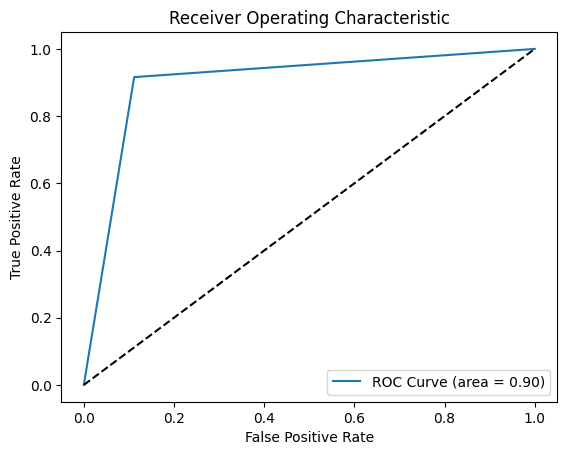

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()

## Random Forest

In [ ]:
ranfor = RandomForestClassifier()
ranfor.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = ranfor.predict(X_train)
y_test_pred = ranfor.predict(X_test)

In [ ]:
classification_eval(y_train, y_train_pred, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[29992   173]
 [   94 29909]]
Accuracy   : 99.56 %
Precision  : 99.42 %
Recall     : 99.69 %


In [ ]:
classification_eval(y_test, y_test_pred, 'Random Forest testing')

Evaluation Model: Random Forest testing
[[18664  1311]
 [ 1579 18558]]
Accuracy   : 92.8 %
Precision  : 93.4 %
Recall     : 92.16 %


## Classification Report

In [ ]:
target_names = ['No Promoted', 'Promoted']
report_train = classification_report(y_train, y_train_pred, target_names=target_names)
print(report_train)

              precision    recall  f1-score   support

 No Promoted       1.00      0.99      1.00     30165
    Promoted       0.99      1.00      1.00     30003

    accuracy                           1.00     60168
   macro avg       1.00      1.00      1.00     60168
weighted avg       1.00      1.00      1.00     60168



In [ ]:
target_names = ['No Promoted', 'Promoted']
report_test = classification_report(y_test, y_test_pred, target_names=target_names)
print(report_test)

              precision    recall  f1-score   support

 No Promoted       0.92      0.93      0.93     19975
    Promoted       0.93      0.92      0.93     20137

    accuracy                           0.93     40112
   macro avg       0.93      0.93      0.93     40112
weighted avg       0.93      0.93      0.93     40112



# Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, ParameterGrid
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

ImportError: ignored

### Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=12)

grid_values = {'max_depth': [3,4,5,6,7,8,9,10, 11],'criterion':['gini', 'entropy' ]}
grid_dt = GridSearchCV(dt, param_grid = grid_values,scoring = 'recall', cv=10)
grid_dt.fit(X_train, y_train)

#Predict values based on new parameters
y_train_pred = grid_dt.predict(X_train)
y_test_pred = grid_dt.predict(X_test)

#best hyperparameters
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary'))
print('F1 : ',f1_score(y_train, y_train_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_train, y_train, cmap=plt.cm.Blues)
plt.show()

# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary'))
print('F1 : ',f1_score(y_test, y_test_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()



### Random Forest

In [ ]:
ranfor = RandomForestClassifier(random_state=12)

grid_values = {'max_depth': [4,5,6],'criterion':['gini', 'entropy' ]}
grid_ranfor = GridSearchCV(ranfor, param_grid = grid_values, scoring = 'recall', cv=10)
grid_ranfor.fit(X_train, y_train)

#Predict values based on new parameters
y_train_pred = grid_ranfor.predict(X_train)
y_test_pred = grid_ranfor.predict(X_test)

#best hyperparameters
print(grid_ranfor.best_params_)
print(grid_ranfor.best_estimator_)

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary'))
print('F1 : ',f1_score(y_train, y_train_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_ranfor, X_train, y_train, cmap=plt.cm.Blues)

# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary'))
print('F1 : ',f1_score(y_test, y_test_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_ranfor, X_test, y_test, cmap=plt.cm.Blues)
plt.show()
plt.show()


### KNN

In [ ]:
KNN = KNeighborsClassifier()

grid_values = {'n_neighbors': [3, 5, 7, 9, 11],  'weights' : ['uniform', 'distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_KNN = GridSearchCV(KNN, param_grid = grid_values, scoring = 'recall', cv=10)
grid_KNN.fit(X_train_scaled, y_train)

#Predict values based on new parameters
y_train_pred = grid_KNN.predict(X_train_scaled)
y_pred = grid_KNN.predict(X_test_scaled)


#best hyperparameters
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

# Model Performance Training
print('PERFORMANCE TRAINING')
print('Accuracy : ',accuracy_score(y_train, y_train_pred))
print('Precision : ',precision_score(y_train, y_train_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_train, y_train_pred, average='binary'))
print('F1 : ',f1_score(y_train, y_train_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_train, y_train_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_train, y_train_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_KNN, X_train, y_train, cmap=plt.cm.Blues)


# Model Performance Testing
print('PERFORMANCE TESTING')
print('Accuracy : ',accuracy_score(y_test, y_test_pred))
print('Precision : ',precision_score(y_test, y_test_pred, average='binary'))
print('Recall/ sensitivity : ',recall_score(y_test, y_test_pred, average='binary'))
print('F1 : ',f1_score(y_test, y_test_pred, average='binary'))
sens, spec, sup = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
print('Specificity : ',spec)
print('Support : ', sup)
print('Confusion matrix :')
print(confusion_matrix(y_test, y_test_pred))
print('Plot Confusion Matrix :')
plot_confusion_matrix(grid_KNN, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

plt.show()

# Pemutation Importance/Feature Importance

## KNN

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X_name = X_train.columns

In [ ]:
pi_KNN = permutation_importance(knn, X_test, y_test, n_repeats = 5, random_state = 12)
pi_KNN = pi_KNN.importances_mean
pi_KNN

In [ ]:
PI_KNN = np.array(X_train.columns)
PI_KNN = pd.DataFrame(X_name, columns =['Variable'])
PI_KNN

In [ ]:
PI_KNN['Permutation_importance'] = pi_KNN
PI_KNN


In [ ]:
PI_KNN.sort_values('Permutation_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
PI_KNN

## Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=12)
dt.fit(X_train, y_train)
fi_dt = dt.feature_importances_
fi_dt

In [ ]:
FI_dt = np.array(X_train.columns)
FI_dt = pd.DataFrame(X_name, columns =['Variable'])
FI_dt

In [ ]:
FI_dt['Feature_importance'] = fi_dt
FI_dt


In [ ]:
FI_dt.sort_values('Feature_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
FI_dt

## Random Forest

In [ ]:
ranfor.fit(X_train, y_train)
fi_ranfor = ranfor.feature_importances_
fi_ranfor

In [ ]:
FI_ranfor = np.array(X_train.columns)
FI_ranfor = pd.DataFrame(X_name, columns =['Variable'])
FI_ranfor

In [ ]:
FI_ranfor['Feature_importance'] = fi_ranfor
FI_ranfor


In [ ]:
FI_ranfor.sort_values('Feature_importance', axis = 0, ascending = False, inplace = True)

In [ ]:
FI_ranfor